# **EP01**

*   Vítor Garcia Comissoli - NUSP: 11810411

## **Links relevantes:**

*   Link para o GitHub: https://github.com/Vitor-Garcia-Comissoli/Codes_from_MAC0417
*   Link para a pasta do Google Drive: https://drive.google.com/drive/folders/1ubIiGba3zHnV96B1JR5jz7j8Usq4PoZH?usp=drive_link


## **Informações sobre a base de imagens:**

As imagens de objetos da base criada foram classificadas em 10 classes de objetos. Para cada classe, escolheu-se entre 1 ou 2 objetos, e no total foram adquiridas imagens de 10 objetos distintos. Para todos os objetos, foram adquiridas imagens em 4 planos de fundo distintos e em 4 tipos de iluminação distintas. No total, para cada um dos 3 critérios (Objetos, Iluminação e Plano de Fundo) existem 3 repetições.

Um sumário referente a base de imagens obtida segue abaixo:

### **Classes:**
*   1 - Mouse (M)
*   2 - SD Card (SD)
*   3 - Lapiseira (LSR)
*   4 - Caneta (CNT)
*   5 - Lápis (LPS)
*   6 - Pendrive (PD)
*   7 - Canivete (CNV)
*   8 - Anel (A)
*   9 - Carta de Baralho (CB)
*   10 - Fone Bluetooth (FB)

### **Fundos:**
*   1 - Preto
*   2 - Branco
*   3 - Cinza
*   4 - Azul Quadriculado

### **Iluminações:**
*   1 - Sem Iluminação
*   2 - Iluminação Branca
*   3 - Iluminação Roxa
*   4 - Iluminação Amarelada


## **Apresentação dos dados:**

### **Input dos arquivos necessários:**

##### **Input pelo Google Drive:**
Inicialmente, deve ser criado um atalho da pasta do Google Drive (fornecida através do link anteriormente) para o Drive do usuário. Em seguida, através do código a seguir, o Google Colab é conectado ao Drive, é montada uma pasta e alterado o diretório da pasta.

##### **Input da pasta baixada localmente:**
Alternativamente, caso tenha baixado o .ipynb, estabelecer uma path para a pasta "EP01" (encontrada no repositório do GitHub).

In [69]:
# Montando a pasta:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/Nono Semestre/MAC 0417/EPs/EP01'

# Descomentar essa linha, e comentar a anterior, após copiar a pasta para o drive pessoal:
# path = '/content/gdrive/My Drive/EP01'

# Descomentar essa linha, e comentar as anteriores, para usar o arquivo baixado nativamente:
# path = 'F:/Downloads/EP01'

# Alterando o diretório:
import os
os.chdir(path)

# Listando os arquivos do diretório:
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'All Images'   Canivete		  'Fone Bluetooth'   Metadados.gsheet   Pendrive
 Anel	      'Carta de Baralho'   Lápis	     Metadados.xlsx    'SD Card'
 Caneta        EP01.ipynb	   Lapiseira	     Mouse


### **Leitura dos Metadados:**

Em seguida, realizou-se a leitura do arquivo de metadados das imagens adquiridas, através do formato de "DataFrame" da biblioteca "Pandas".

O arquivo de metadados possui uma tabela principal, com as informações de condição de aquisição de cada imagem, e também as tabelas de "Classe", "Plano de Fundo" e "Iluminacao".

In [70]:
# Leitura do arquivo de Metadados:
import pandas as pd
metadados = pd.read_excel('Metadados.xlsx', sheet_name='Metadados')
%load_ext google.colab.data_table
metadados

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,index,name_jpg,class,obj_number,repeticao,plano_de_fundo,iluminacao
0,1,A_ama_1,1,1,1,4,4
1,2,A_bra_1,1,1,1,4,2
2,3,A_esc_1,1,1,1,4,1
3,4,A_roxo_1,1,1,1,4,3
4,5,B_ama_1,1,1,1,2,4
...,...,...,...,...,...,...,...
475,476,C_roxo_3,10,1,3,3,3
476,477,P_ama_3,10,1,3,1,4
477,478,P_bra_3,10,1,3,1,2
478,479,P_esc_3,10,1,3,1,1


In [71]:
# Leitura da tabela contendo os códigos das classes de objetos:
classes = pd.read_excel('Metadados.xlsx', sheet_name='Classe')
classes

,index,codigo,desc,abrv
0,0,1,Mouse,M
1,1,2,SD Card,SD
2,2,3,Lapiseira,LSR
3,3,4,Caneta,CNT
4,4,5,Lápis,LPS
5,5,6,Pendrive,PD
6,6,7,Canivete,CNV
7,7,8,Anel,A
8,8,9,Carta de Baralho,CB
9,9,10,Fone Bluetooth,FB


In [72]:
# Leitura da tabela contendo os códigos dos fundos utilizados para as aquisições:
fundos = pd.read_excel('Metadados.xlsx', sheet_name='Plano de Fundo')
fundos

,index,codigo,desc
0,0,1,Preto
1,1,2,Branco
2,2,3,Cinza
3,3,4,Azul Quadriculado


In [73]:
# Leitura da tabela contendo os códigos das iluminações utilizadas para as aquisições:
iluminacoes = pd.read_excel('Metadados.xlsx', sheet_name='Iluminacao')
iluminacoes

,index,codigo,desc
0,0,1,Sem Iluminação
1,1,2,Iluminação Branca
2,2,3,Iluminação Roxa
3,3,4,Iluminação Amarelada


### **Tabela Sumária:**

Pela planilha de metadados, é possível gerar uma tabela sumária, que apresenta um resumo geral das imagens obtidas.

Essa tabela contém o nome de cada uma das classes, o número de classes de objetos, o número total de imagens, o tamanho total da base de imagens criada, e, por fim, a resolução das imagens para cada uma das classes.

In [74]:
descricao_tgs = ['Nome das classes','Número de classes', 'Número de imagens', 'Tamanho da base (MB)']
c = ''
for j in range(len(classes['desc'])-1):
  c += classes["desc"][j] + ', '
c += classes["desc"][j+1]
valores_tgs = [c, classes.shape[0], metadados.shape[0]] # Nome das classes, número total de classes e número total de amostras

# Computando o tamanho da base e verificando a resolução das imagens por classe:
from skimage import io

diretorio = path + "/"

tamanho_total = 0
classes_descr = []

for i in range(classes.shape[0]): # Criação dos atributos da tabela global sumária
  classe = classes.iloc[i]['desc']
  classes_descr.append(classe)

  imgs = metadados.iloc[i]['name_jpg']

  nomes_imagens = os.listdir(diretorio + classe)
  for n in nomes_imagens:
    tamanho_total += os.path.getsize(diretorio + classe + '/' + n)
  im = io.imread(diretorio + classe + '/' + imgs + '.jpg')
  descricao_tgs.append('Resolução imagens da classe ' + classe)
  valores_tgs.append(str(im.shape[0]) + ' x ' + str(im.shape[1]))  # Resolução
valores_tgs.insert(2, metadados["name_jpg"].nunique())  # Tamanho da base

# Tabela:
tgs = pd.DataFrame(list(zip(descricao_tgs, valores_tgs)), columns = ['Descrição', 'Valor'])
tgs.set_index('Descrição')

,Valor
Descrição,
Nome das classes,"Mouse, SD Card, Lapiseira, Caneta, Lápis, Pend..."
Número de classes,10
Número de imagens,48
Tamanho da base (MB),480
Resolução imagens da classe Mouse,2252 x 4000
Resolução imagens da classe SD Card,2252 x 4000
Resolução imagens da classe Lapiseira,2252 x 4000
Resolução imagens da classe Caneta,2252 x 4000
Resolução imagens da classe Lápis,2252 x 4000


### **Tabela Detalhada por Classe:**

Também é possível analisar-se separadamente os dados de cada uma das classes de objetos por meio de tabela detalhada por classe, apresentada a seguir, que descreve os nomes de cada classe, a quantidade de objetos por classe, as variações de plano de fundo e de iluminação utilizadas, o número de repetições realizadas em cada situação e, por fim, o número total de imagens adquiridas para cada classe.

In [75]:
numero_objetos = []
total_amostras = []
variacoes_fundo = []
variacoes_iluminacao = []
numero_repeticoes = []

# Descrição em texto da relação entre os códigos e a descrição dos fundos das imagens
descricao_fundo = ''
for f in range(fundos.shape[0]):
  descricao_fundo += str(fundos.iloc[f]['codigo']) + '-' + str(fundos.iloc[f]['desc'])
  if f < fundos.shape[0]-1:
    descricao_fundo += ', '

# Descrição em texto da relação entre os códigos e a descrição das iluminações nas imagens
descricao_iluminacao = ''
for il in range(iluminacoes.shape[0]):
  descricao_iluminacao += str(iluminacoes.iloc[il]['codigo']) + '-' + str(iluminacoes.iloc[il]['desc'])
  if il < iluminacoes.shape[0]-1:
    descricao_iluminacao += ', '

# Construção dos atributos da tabela detalhada por classe
for i in range(classes.shape[0]):
  codigo = classes.iloc[i]['codigo']
  numero_objetos.append(metadados[metadados['class']==codigo]['obj_number'].nunique())
  variacoes_fundo.append(str(fundos.shape[0]) + ' (' + descricao_fundo + ')')
  variacoes_iluminacao.append(str(iluminacoes.shape[0]) + ' (' + descricao_iluminacao + ')')
  numero_repeticoes.append(metadados['repeticao'].nunique())
  total_amostras.append(metadados[metadados['class']==codigo]['name_jpg'].nunique())

# Tabela:
tdc = pd.DataFrame(list(zip(classes_descr, numero_objetos, variacoes_fundo, variacoes_iluminacao, numero_repeticoes, total_amostras)),
                   columns = ['Nome do objeto', 'Número de objetos', 'Variações de fundo (com descrição)',
                              'Variações de iluminação (com descrição)', 'Número de repetições', 'Total de amostras'])
tdc.set_index("Nome do objeto")

,Número de objetos,Variações de fundo (com descrição),Variações de iluminação (com descrição),Número de repetições,Total de amostras
Nome do objeto,,,,,
Mouse,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
SD Card,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Lapiseira,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Caneta,2,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Lápis,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Pendrive,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Canivete,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Anel,1,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48
Carta de Baralho,2,"4 (1-Preto, 2-Branco, 3-Cinza, 4-Azul Quadricu...","4 (1-Sem Iluminação, 2-Iluminação Branca, 3-Il...",3,48


### **Visualização da Base de Imagens**

A partir da base criada, é pode-se visualizá-la através de uma matriz em uma única imagem mostrada a seguir, em que cada linha dessa matriz representa uma classe (seguindo a ordem de 1 a 10 estabelecida no começo desse notebook) e cada coluna apresenta uma imagem distinta dessa classe.

As imagens apresentadas foram selecionadas aleatoriamente para cada classe, uma vez que existem mais que 10 imagens por classe, e uma visualização com mais imagens torana-se difícil de ser interpretada, visto o tamanho pequeno de cada uma das imagens.

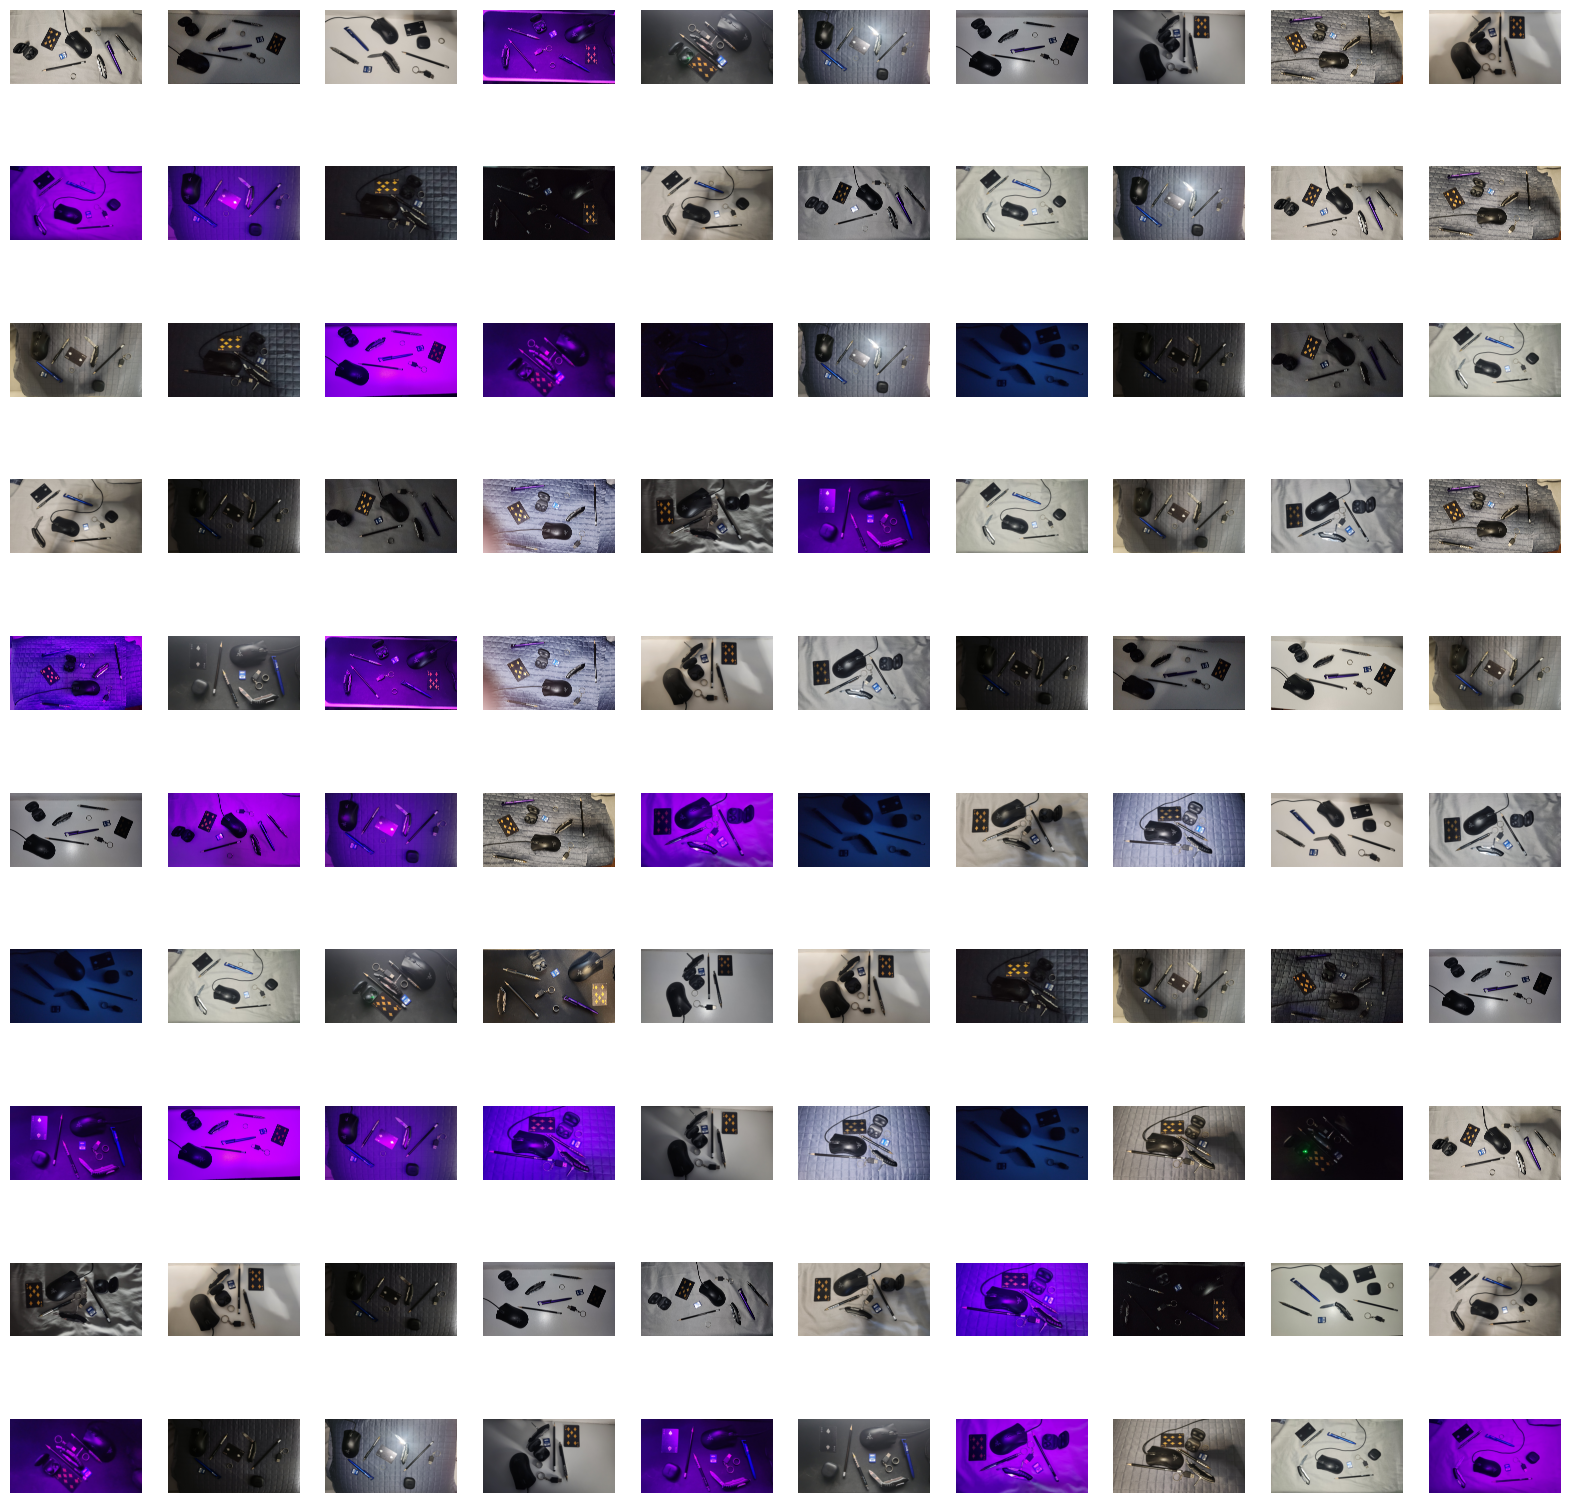

In [76]:
import random

imagens = []
for i in range(classes.shape[0]):
  classe = classes.iloc[i]['desc']
  nomes_imagens = os.listdir(diretorio + classe)
  amostra = random.sample(nomes_imagens, 10) # Seleção aleatória das imagens
  for a in amostra:
    imagens.append(io.imread(diretorio + classe + '/' + a)) # Leitura das imagens selecionadas aleatoriamente

import matplotlib.pyplot as plt
n_colunas, n_linhas = 10, classes.shape[0]
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))
for i,imagem in enumerate(imagens): # Exibição do conjunto de imagens
    l, c = (i//n_colunas, i%n_colunas)
    axs[l,c].imshow(imagem)
    axs[l,c].axis('off')
plt.show()